In [1]:
# xcube_sh imports
from xcube_sh.cube import open_cube
from xcube_sh.config import CubeConfig
from xcube_sh.sentinelhub import SentinelHub

## Sentinel-1

Issues:
- How to query by track number
- bands 'localIncidenceAngle' and 'shadowMask' return an error
- how to set the value for 'orthorectify' in the Processing Options (https://docs.sentinel-hub.com/api/latest/data/sentinel-1-grd/#processing-options)?

In [2]:
 SentinelHub().band_names('S1GRD') 

['VV', 'HH', 'VH', 'localIncidenceAngle', 'scatteringArea', 'shadowMask', 'HV']

In [3]:
cube_config_s1 = CubeConfig(
    dataset_name='S1GRD',
    band_names=['VV', 'VH', 'localIncidenceAngle', 'shadowMask'],
    bbox=[11.02, 46.65, 11.36, 46.95],
    spatial_res=0.0018,   # = 100 meters in degree>
    time_range=['2018-02-01', '2018-06-30'],
    time_period='6D'
)

In [4]:
cube_s1 = open_cube(cube_config_s1)
cube_s1

<xarray.Dataset>
Dimensions:              (time: 25, lat: 167, lon: 189, bnds: 2)
Coordinates:
  * lat                  (lat) float64 46.95 46.95 46.95 ... 46.65 46.65 46.65
  * lon                  (lon) float64 11.02 11.02 11.02 ... 11.36 11.36 11.36
  * time                 (time) datetime64[ns] 2018-02-04 ... 2018-06-28
    time_bnds            (time, bnds) datetime64[ns] dask.array<chunksize=(25, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    VH                   (time, lat, lon) float32 dask.array<chunksize=(1, 167, 189), meta=np.ndarray>
    VV                   (time, lat, lon) float32 dask.array<chunksize=(1, 167, 189), meta=np.ndarray>
    localIncidenceAngle  (time, lat, lon) float32 dask.array<chunksize=(1, 167, 189), meta=np.ndarray>
    shadowMask           (time, lat, lon) float32 dask.array<chunksize=(1, 167, 189), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.7
    title:                     S1GRD Data Cube Subset
    history:                   [{'program': 'xcube_sh.chunkstore.SentinelHubC...
    date_created:              2023-03-07T06:54:16.049322
    time_coverage_start:       2018-02-01T00:00:00+00:00
    time_coverage_end:         2018-07-01T00:00:00+00:00
    ...                        ...
    time_coverage_resolution:  P6DT0H0M0S
    geospatial_lon_min:        11.02
    geospatial_lat_min:        46.65
    geospatial_lon_max:        11.360199999999999
    geospatial_lat_max:        46.9506
    processing_level:          L1B

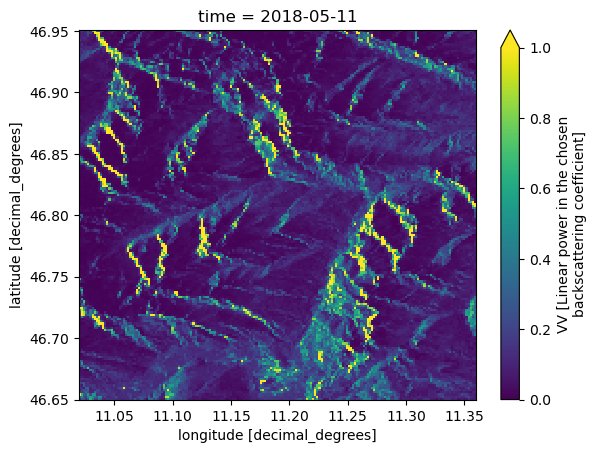

In [5]:
 cube_s1.VV.sel(time='2018-05-10', method='nearest').plot.imshow(vmin=0, vmax=1)

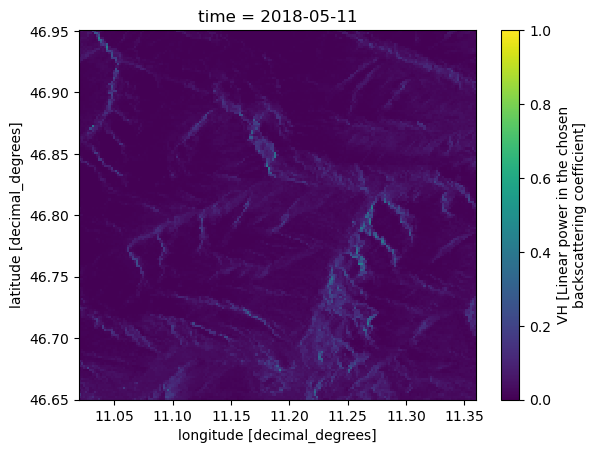

In [6]:
 cube_s1.VH.sel(time='2018-05-10', method='nearest').plot.imshow(vmin=0, vmax=1)

In [7]:
 cube_s1.localIncidenceAngle.sel(time='2018-05-10', method='nearest').plot.imshow(vmin=0, vmax=1)

Failed to fetch data from Sentinel Hub after 44.90783905982971 seconds and 200 retries
HTTP status code was 400


SentinelHubError: 400 Client Error: Bad Request for url: https://services.sentinel-hub.com/api/v1/process

In [8]:
 cube_s1.shadowMask.sel(time='2018-05-10', method='nearest').plot.imshow(vmin=0, vmax=1)

Failed to fetch data from Sentinel Hub after 39.48806810379028 seconds and 200 retries
HTTP status code was 400


SentinelHubError: 400 Client Error: Bad Request for url: https://services.sentinel-hub.com/api/v1/process

## Sentinel-3 SLSTR

Issues:
- S1 band have only values of 0 and 1

In [9]:
SentinelHub().band_names('S3SLSTR')

['S1',
 'S2',
 'S3',
 'S4',
 'S4_A',
 'S4_B',
 'S5',
 'S5_A',
 'S5_B',
 'S6',
 'S6_A',
 'S6_B',
 'S7',
 'S8',
 'S9',
 'F1',
 'F2',
 'CLOUD_FRACTION',
 'SEA_ICE_FRACTION',
 'SEA_SURFACE_TEMPERATURE',
 'DEW_POINT',
 'SKIN_TEMPERATURE',
 'SNOW_ALBEDO',
 'SNOW_DEPTH',
 'SOIL_WETNESS',
 'TEMPERATURE',
 'TOTAL_COLUMN_OZONE',
 'TOTAL_COLUMN_WATER_VAPOR']

In [36]:
cube_config_s3 = CubeConfig(
    dataset_name='S3SLSTR',
    band_names=['S1'],
    bbox=[11.02, 46.65, 11.36, 46.95],
    spatial_res=0.009,   # = 500 meters in degree>
    upsampling='BILINEAR',
    downsampling='BILINEAR',
    time_range=['2018-02-01', '2018-06-30']
)

/opt/conda/envs/edc-default-2022.10-14/lib/python3.9/site-packages/xcube_sh/config.py:248: FutureWarning: Units 'M', 'Y' and 'y' do not represent unambiguous timedelta values and will be removed in a future version.
  time_tolerance = pd.to_timedelta(time_tolerance)


In [37]:
cube_s3 = open_cube(cube_config_s3, api_url="https://creodias.sentinel-hub.com")
cube_s3

<xarray.Dataset>
Dimensions:    (time: 230, lat: 33, lon: 38, bnds: 2)
Coordinates:
  * lat        (lat) float64 46.94 46.93 46.92 46.92 ... 46.68 46.67 46.66 46.65
  * lon        (lon) float64 11.02 11.03 11.04 11.05 ... 11.33 11.34 11.35 11.36
  * time       (time) datetime64[ns] 2018-02-01T20:13:30 ... 2018-06-29T21:16:59
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(230, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    S1         (time, lat, lon) float32 dask.array<chunksize=(1, 33, 38), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   S3SLSTR Data Cube Subset
    history:                 [{'program': 'xcube_sh.chunkstore.SentinelHubChu...
    date_created:            2023-03-07T06:52:28.574972
    time_coverage_start:     2018-02-01T20:13:30.178000+00:00
    time_coverage_end:       2018-06-29T21:17:14.559000+00:00
    time_coverage_duration:  P148DT1H3M44.381S
    geospatial_lon_min:      11.02
    geospatial_lat_min:      46.65
    geospatial_lon_max:      11.362
    geospatial_lat_max:      46.946999999999996
    processing_level:        L1B

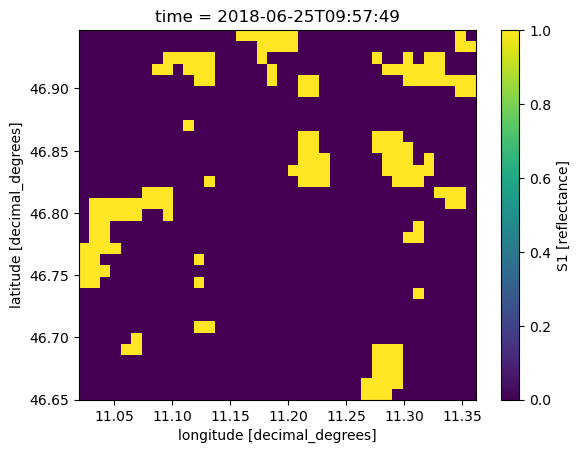

In [38]:
cube_s3.S1.sel(time='2018-06-25', method='nearest').plot.imshow()